# Introduction


### Finding Tsync for Kuramoto model

First freeze parameter at (K,gamma) = (3,1), and then find R_final

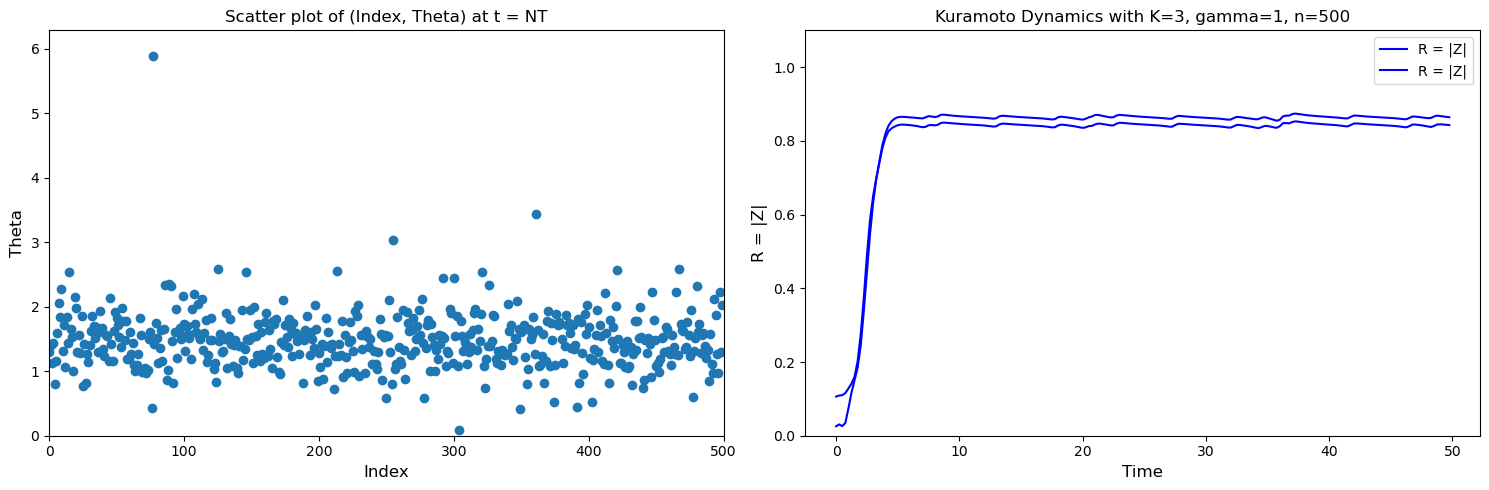

0.8524359647959056

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Initial setups
dt, T, n = 0.25, 50, 500
K, mu, gamma = 3, 0, 1  
#omega_dist = 'uniform_deterministic'
omega_dist = 'gaussian_random'
omega = make_omega(mu, gamma,n, omega_dist=omega_dist)
z0 = np.random.uniform(0,2*np.pi,n)
(t,NT) = (0,int(T/dt))
args = (K,omega)

# Simulation loop
z = z0
Zs = []
ts = []
for t in range(NT):
    Z = find_sync_order_parameter(z)
    Zs.append(Z)
    z = rk4(dt, z, rhs_kuramoto, args)
    ts.append(t * dt)
              
# Data extraction
R = [np.abs(Z) for Z in Zs]
theta_final = np.mod(z, 2*np.pi)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Scatter plot of (index, theta) at t = NT
indices = np.arange(n)
ax[0].scatter(indices, theta_final)
ax[0].set_xlim([0, n])
ax[0].set_ylim([0, 2*np.pi])
ax[0].set_xlabel('Index', fontsize=12)
ax[0].set_ylabel('Theta', fontsize=12)
ax[0].set_title('Scatter plot of (Index, Theta) at t = NT')

# Right plot: Dynamics of R over time
ax[1].plot(ts, R, label="R = |Z|", color="blue")
ax[1].set_xlabel('Time', fontsize=12)
ax[1].set_ylabel('R = |Z|', fontsize=12)
ax[1].set_title(f"Kuramoto Dynamics with K={K}, gamma={gamma}, n={n}")
ax[1].set_ylim([0, 1.1])
ax[1].legend()

plt.tight_layout()
plt.show()

cutoff = int(0.9*len(Zs))
Rfinal = np.mean(np.abs(Zs[cutoff:]))
Rfinal


### Now use this to find the Tsync

In [4]:
import os
from datetime import date

def simulate_sync_time(eps, R_final, dt, T, n, K, gamma, omega_dist, mu):
    # Initial setups
    omega = make_omega(mu, gamma, n, omega_dist=omega_dist)
    z0 = np.random.uniform(0, 2 * np.pi, n)
    (t, NT) = (0, int(T/dt))
    args = (K, omega)

    # Simulation loop
    z = z0
    for t in range(NT):
        Z = find_sync_order_parameter(z)
        R_current = np.abs(Z)
        
        # Check if R_current is within eps of R_final
        if abs(R_current - R_final) < eps:
            return t * dt  # Return the current time as T_sync(eps)
        
        z = rk4(dt, z, rhs_kuramoto, args)
        
    return None  # Return None if the system did not synchronize within the given time T


# Pars
R_final = 0.9370751384882592  # from above
N_trial = 5*10**3  # Or any other number of trials
eps = 0.01  # Or any other small value for epsilon
Tsync_values = []

# Make data
for trial in range(N_trial):
    Tsync = simulate_sync_time(eps, R_final, dt, T, n, K, gamma, omega_dist, mu)
    if Tsync is not None:
        Tsync_values.append(Tsync)

# Save
dir_name = "data/"
os.makedirs(dir_name, exist_ok=True)
current_date = date.today().strftime('%Y-%m-%d')
fname = f"{dir_name}{current_date}/Tsync_kuramoto_K{K}_gamma{gamma}_n{n}_eps{eps}.npy"
os.makedirs(os.path.dirname(fname), exist_ok=True)
np.save(fname, Tsync_values)

# Plot
plt.hist(Tsync_values, bins=20, edgecolor='k')
plt.xlabel('Tsync(eps)')
plt.ylabel('Number of Trials')
plt.title('Distribution of Synchronization Times')
plt.show()
